## Unsipervised learning example using Dictionary Learning 

Problem description:

Suppose you’re given samples of some time series and you want to detect anomaly in those samples, i.e. want to be able to identify which of those samples is ‘abnormal’. One can use scikit-learn Sparse Dictionary Learning algorithm for the anomaly detection in the time series.

Idea of the Dictionary Learning:

Train the dictionary to learn the sparse representation of the data (sparse coding) in the form of a linear combination of the basic elements - atoms.

### import libs and define some useful functions

In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn.decomposition import DictionaryLearning, SparseCoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [2]:
from math import sqrt

def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)

def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))

def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

### generate dummy data

Lets define ‘expected’ time series to be integers, between 0 and 10, and the size of each sample to be 10

In [3]:
data_train = np.reshape(np.random.randint(low=0, high=10, size=1000), (-1,10))

Train dictionary with 20 atoms, size of atoms: 10

In [4]:
dl = DictionaryLearning(n_components=20)
model = dl.fit(data_train)

Extract the dictionary

In [5]:
dictionary = model.components_
print('dictionary shape: ', dictionary.shape)

dictionary shape:  (20, 10)


OMP - orthogonal matching peruit 

Lets again regenerate data, but this time lets insert samples with ‘abnormal’ samples of time series, where ‘abnormal’ samples should have different range, between 5 and 15. Our goal should be to detect those abnormal samples.

In [6]:
data_test = np.reshape(np.random.randint(low=0, high=10, size=20000), (-1,10))
data_test[15] = np.random.randint(low=10, high=15, size=10)

In [7]:
encoded_data_test = model.transform(data_test)

In [8]:
data_test[:20]

array([[ 7,  6,  3,  4,  8,  1,  4,  3,  5,  1],
       [ 9,  3,  4,  5,  3,  5,  1,  0,  0,  4],
       [ 7,  0,  1,  5,  2,  7,  6,  7,  3,  5],
       [ 6,  5,  2,  0,  4,  0,  8,  5,  6,  6],
       [ 4,  4,  8,  2,  1,  5,  8,  3,  9,  5],
       [ 6,  7,  4,  2,  6,  2,  0,  2,  5,  7],
       [ 9,  6,  0,  5,  0,  5,  0,  0,  0,  5],
       [ 1,  6,  2,  9,  8,  6,  7,  1,  4,  5],
       [ 5,  1,  5,  4,  4,  7,  7,  0,  9,  1],
       [ 9,  3,  0,  2,  1,  0,  7,  3,  5,  1],
       [ 0,  8,  2,  0,  0,  7,  5,  5,  6,  0],
       [ 0,  0,  5,  2,  5,  4,  4,  8,  1,  0],
       [ 9,  5,  5,  8,  0,  6,  4,  9,  0,  1],
       [ 0,  4,  7,  7,  0,  9,  2,  2,  4,  3],
       [ 7,  0,  5,  5,  4,  4,  4,  0,  0,  9],
       [12, 11, 14, 12, 11, 12, 12, 14, 10, 14],
       [ 7,  1,  2,  4,  7,  3,  2,  1,  5,  3],
       [ 7,  5,  3,  7,  8,  4,  9,  5,  8,  3],
       [ 6,  8,  0,  7,  4,  1,  8,  1,  0,  4],
       [ 6,  2,  6,  1,  6,  3,  7,  4,  0,  0]])

Next step is to reconstruct data using dictionary

In [9]:
encoded_out=[]
for i in range(encoded_data_test.shape[0]):
    encoded_out.append(np.sum(dictionary.T*encoded_data_test[i], axis=1))

Lets compare reconstructed data with the original data using different similarity measurements:

In [10]:
cs = [cosine_similarity(encoded_out[i], data_test[i]) 
          for i in range(0, len(data_test))]
ed = [euclidean_distance(encoded_out[i], data_test[i]) 
          for i in range(0, len(data_test))]
md = [manhattan_distance(encoded_out[i], data_test[i]) 
          for i in range(0, len(data_test))]

As one can see from the histograms below, euclidean and manhattan distances give a good indication for detecting abnormal sample (less obvious with the cosine similarity measure)

Text(0,0.5,'# events')

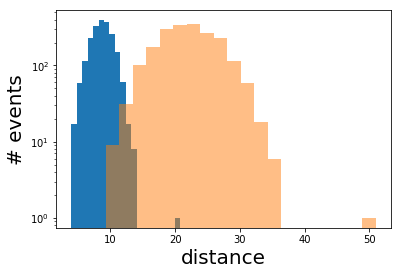

In [11]:
p1 = plt.hist(ed, bins=20, log=True) 
p2 = plt.hist(md, bins=20, alpha=0.5, log=True)
plt.xlabel('distance', fontsize=20)
plt.ylabel('# events', fontsize=20)

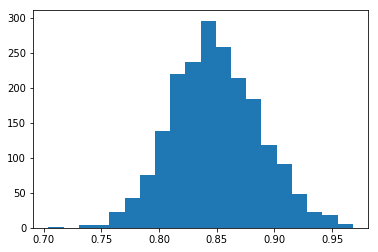

In [12]:
plt.show(plt.hist(cs, bins=20))

Investigating dictionary, work in progress..

In [13]:
d_atoms = []
for i in range(0, len(dictionary)):
    for j in range(i+1, len(dictionary)):
        d_atoms.append(manhattan_distance(dictionary[i], dictionary[j]))

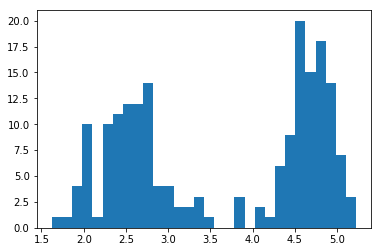

In [14]:
plt.show(plt.hist(d_atoms, bins=30))